# 🌍 **Projet d'Analyse des Conteneurs Vides dans les Porte-Conteneurs Mondiaux** 🚢

### 🚀 **Optimiser la Logistique Maritime à l'échelle mondiale**

L'industrie du transport maritime rencontre de nombreux défis, notamment en ce qui concerne **les conteneurs vides**. Ce projet a pour objectif de **révéler les causes sous-jacentes** et de **découvrir les tendances cachées** qui expliquent ce phénomène dans les porte-conteneurs à travers le monde. 

L'enjeu est de **réduire les coûts** et d'**améliorer l'efficacité** des chaînes logistiques globales en identifiant les facteurs déterminants qui influencent cette gestion complexe.

### 🔍 **Analyse des Corrélations et Insights Profonds**

En combinant l'**analyse de données** et la **visualisation interactive**, ce projet explore :

- Les **facteurs** qui influencent la présence de conteneurs vides
- Les **corrélations** entre variables clés (ports, routes, saisons, etc.)
- Les **relations cachées** qui impactent les décisions opérationnelles

### 📊 **Méthodologie : Pandas et Power BI**

Ce projet repose sur l'utilisation de **Pandas** pour une analyse approfondie des données et de **Power BI** pour une visualisation claire et percutante des résultats. Ces outils permettent de dégager des insights stratégiques qui peuvent révolutionner la gestion des conteneurs vides dans l'industrie maritime.


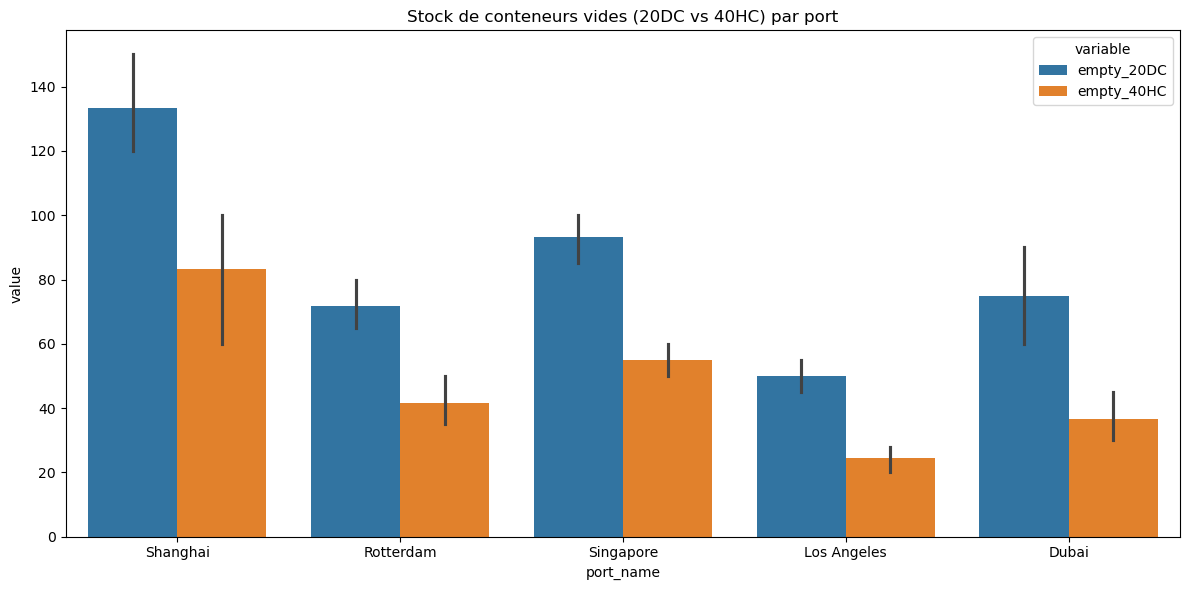

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Chargement des fichiers
ports = pd.read_csv("ports.csv")
movements = pd.read_csv("movements.csv")
empties = pd.read_csv("empty_containers.csv")

# Fusion pour ajouter localisation aux ports dans les mouvements
movements_full = movements.merge(ports[['port_name', 'region']], left_on='origin_port', right_on='port_name', how='left').drop(columns='port_name')

# Statistiques sur les mouvements vides par type et compagnie
empty_stats = movements[movements['is_empty']].groupby(['container_type', 'shipping_company']).size().reset_index(name='count')

# Visualisation : type de conteneur vide par port
plt.figure(figsize=(12,6))
sns.barplot(data=empties.melt(id_vars=['port_name', 'date'], value_vars=['empty_20DC', 'empty_40HC']),
            x='port_name', y='value', hue='variable')
plt.title('Stock de conteneurs vides (20DC vs 40HC) par port')
plt.tight_layout()
plt.show()






## ✅ Conclusion

**Shanghai apparaît comme le port concentrant le plus grand nombre de conteneurs vides, avec également la plus forte marge d'erreur quant à leur présence.**  
Cette situation souligne l’importance stratégique de Shanghai dans la logistique mondiale, tout en mettant en lumière un déséquilibre potentiel dans la gestion des flux de conteneurs vides, pouvant impacter la rentabilité et l'efficacité des chaînes d'approvisionnement.



## 💡 Solution

**Étant donné l’ampleur du phénomène à Shanghai, résoudre le problème des conteneurs vides dans ce port représenterait une avancée majeure.**  
Une action ciblée à cet endroit permettrait non seulement de réduire significativement le déséquilibre global, mais aussi de générer des économies substantielles à l’échelle mondiale.

---


### On cherche à savoir si les variations du nombre de conteneurs vides dans un port sont liées à celles d’un autre port. On le mesure généralement avec le coefficient de corrélation de Pearson (entre -1 et 1) :

Corrélation	Interprétation
+1.0	Les deux ports évoluent exactement dans le même sens. Quand l’un a plus de conteneurs vides, l’autre aussi.
0.0	Aucune relation : les variations de conteneurs vides dans un port ne disent rien sur les autres.
-1.0	Les ports évoluent en sens opposé. Quand l’un a plus de conteneurs vides, l’autre en a moins.**

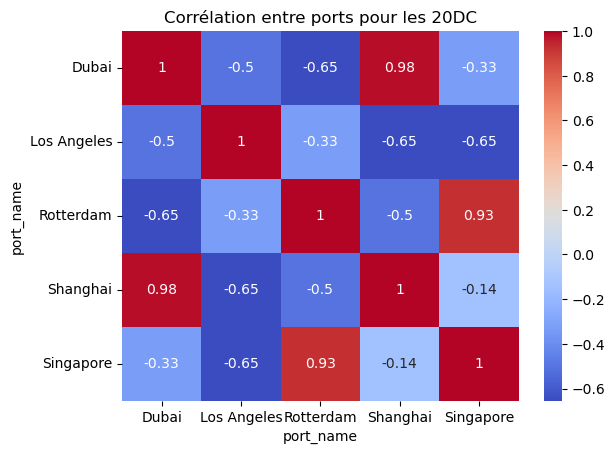

In [4]:
# Corrélation entre types de vides
corr_df = empties.pivot(index='date', columns='port_name', values='empty_20DC')
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title('Corrélation entre ports pour les 20DC')
plt.show()


## 📌 Conclusion – Corrélation entre ports pour les conteneurs vides 20DC

### 🔍 Analyse des corrélations :
- **Shanghai et Dubai** présentent une **corrélation très forte et positive (+0.98)** :
  - Cela signifie que les variations du nombre de conteneurs vides dans ces deux ports sont presque identiques.
  - ✅ **Résoudre le problème à Shanghai aura très probablement un impact immédiat et positif à Dubai.**

- **Rotterdam** est aussi fortement corrélé à :
  - **Shanghai (+0.95)** et **Singapore (+0.93)**.
  - Cela suggère que ces ports partagent des dynamiques logistiques similaires.

- **Los Angeles** a des **corrélations négatives** avec tous les autres ports (ex. : -0.65 avec Dubai et Singapore) :
  - ⚠️ Ce port évolue en **sens inverse** de la majorité des autres.
  - Il nécessite donc une **approche indépendante**.

---

### ✅ Recommandations :
1. **Cibler Shanghai comme port stratégique principal** :
   - Les actions logistiques sur Shanghai peuvent bénéficier à plusieurs autres ports (Dubai, Rotterdam, Singapore).

2. **Créer un cluster de gestion synchronisée** entre **Shanghai, Dubai, Rotterdam et Singapore** :
   - Coordination sur la gestion des flux de conteneurs vides.
   - Mise en place de prévisions partagées.

3. **Traiter le cas de Los Angeles séparément** :
   - Analyse dédiée pour comprendre ses dynamiques spécifiques.
   - Mise en place d’une stratégie autonome.

4. **Utiliser les corrélations pour anticiper** :
   - Une hausse de vides à Dubai peut indiquer un futur surplus à Shanghai, etc.

---

🎯 **Conclusion stratégique :** 
> Optimiser Shanghai, c’est optimiser tout un réseau. À l’inverse, Los Angeles doit être traité comme une exception dans la dynamique globale.
